<a href="https://colab.research.google.com/github/nczarli/f-jl221-2/blob/main/soft_teacher_custom_dataset_visualisation_and_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nczarli/f-jl221-2.git
!git clone https://github.com/nczarli/SoftTeacherCustomDataset.git

Cloning into 'f-jl221-2'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 118 (delta 49), reused 67 (delta 21), pack-reused 0
Receiving objects: 100% (118/118), 4.18 MiB | 5.01 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Cloning into 'SoftTeacherCustomDataset'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 317 (delta 122), reused 116 (delta 108), pack-reused 148
Receiving objects: 100% (317/317), 592.00 KiB | 11.38 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [2]:
ls

f-jl221-2/  sample_data/  SoftTeacherCustomDataset/


In [3]:
cd SoftTeacherCustomDataset/

/content/SoftTeacherCustomDataset


In [4]:
ls

configs/  LICENSE   README.md         resources/   setup.py  tools/
demo/     Makefile  requirements.txt  SECURITY.md  ssod/


In [5]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.4 MB/s eta 0:14:31tcmalloc: large alloc 1147494400 bytes == 0x3a678000 @  0x7f152c288615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:33tcmalloc: large alloc 1434370048 bytes == 0x7ecce000 @  0x7f152c288615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████

In [6]:
pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     |████████████████████████████████| 50.4 MB 2.3 MB/s 
     |████████████████████████████████| 190 kB 16.6 MB/s 


In [7]:
!make install

make pre
make[1]: Entering directory '/content/SoftTeacherCustomDataset'
python -m pip install -r requirements.txt -f https://download.pytorch.org/whl/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1.9 MB 34.0 MB/s 
     |████████████████████████████████| 166 kB 49.7 MB/s 
     |████████████████████████████████| 182 kB 10.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 166 kB 66.5 MB/s 
     |████████████████████████████████| 162 kB 78.4 MB/s 
     |████████████████████████████████| 162 kB 77.6 MB/s 
     |████████████████████████████████| 158 kB 64.9 MB/s 
     |████████████████████████████████| 157 kB 76.8 MB/s 
     |████████████████████████████████| 157 kB 74.8 MB/s 
     |████████████████████████████████| 157 kB 73.6 MB/s 
     |█████████████████████

In [8]:
cd ..

/content


In [9]:
ls

f-jl221-2/  sample_data/  SoftTeacherCustomDataset/


In [10]:
!cp -R f-jl221-2/labels_generated/ SoftTeacherCustomDataset/labels_generated

In [11]:
cd SoftTeacherCustomDataset/

/content/SoftTeacherCustomDataset


In [12]:
ls

configs/           LICENSE    requirements.txt  setup.py        thirdparty/
demo/              Makefile   resources/        ssod/           tools/
labels_generated/  README.md  SECURITY.md       ssod.egg-info/


In [13]:
# Preprocess the images, scale y axis by 1.5

# find all bmp images in labels_generated folder
# for each image resize y axis by 1.5 times and overwrite the image

import os
import cv2
import numpy as np

# get all bmp files in labels_generated and subfolders
bmp_files = []

for root, dirs, files in os.walk("labels_generated"):
    for file in files:
        if file.endswith(".bmp"):
             bmp_files.append(os.path.join(root, file))
print(len(bmp_files))
# resize each bmp file
for bmp_file in bmp_files:
    img = cv2.imread(bmp_file, cv2.IMREAD_UNCHANGED)
    print(img.shape)
    img = cv2.resize(img, (0,0), fx=1, fy=1.5)
    print(img.shape)
    cv2.imwrite(bmp_file, img)

16
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)
(500, 448)
(750, 448)


In [15]:
!bash tools/dist_train.sh configs/baseline/faster_rcnn_r50_caffe_fpn_generated_label.py 1

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:164: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  "The module torch.distributed.launch is deprecated "
The module torch.distributed.launch is deprecated and going to be removed in future.Migrate to torch.distributed.run
 Please read local_rank from `os.environ('LOCAL_RANK')` instead.
INFO:torch.distributed.launcher.api:Starting elastic_operator with launch configs:
  entrypoint       : tools/train.py
  min_nodes        : 1
  max_nodes        : 1
  nproc_per_node   : 1
  run_id           : none
  rdzv_backend     : static
  rdzv_endpoint    : 127.0.0.1:29500
  rdzv_configs     : {'rank': 0, 'timeout': 900}
  max_restarts     : 3
  monitor_interval : 5
  log_dir          : None
  metrics_cfg      : {}

INFO:torch.distributed.elastic.agent.server.local_elastic_agent:log directory set to: /tmp/torchelastic_y0skv94c/none_0sh126ja
INFO:torch.distributed.elastic.agent.server.api:[default] starti

# Inference

## Add paths of thirdparty packages

In [16]:
import sys
sys.path.insert(0,'/content/SoftTeacherCustomDataset/thirdparty/mmdetection/mmdet')

In [44]:
import sys
print(sys.path)

[' /content/SoftTeacherCustomDataset', '/content/SoftTeacherCustomDataset/thirdparty/mmdetection/mmdet', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [38]:
import sys
sys.path.insert(0,' /content/SoftTeacherCustomDataset')

In [50]:
!export PYTHONPATH=$(pwd)

In [65]:
cd /content/SoftTeacherCustomDataset/thirdparty/mmdetection/mmdet

/content/SoftTeacherCustomDataset/thirdparty/mmdetection/mmdet


In [66]:
import mmdet

In [67]:
cd /content

/content


## Visualise

In [61]:
%matplotlib inline 
import mmcv
from matplotlib import pyplot as plt
from mmdet.apis import init_detector, inference_detector

config_file = 'SoftTeacherCustomDataset/configs/baseline/faster_rcnn_r50_caffe_fpn_generated_label.py'
checkpoint_file = 'SoftTeacherCustomDataset/work_dirs/faster_rcnn_r50_caffe_fpn_generated_label/iter_200.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image and show the results
img = '/content/SoftTeacherCustomDataset/labels_generated/test/images/Cherries,24,19-08-2022,18-10-52,pass.bmp'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)
# visualize the results in a new window
data = model.show_result(img, result)


load checkpoint from local path: SoftTeacherCustomDataset/work_dirs/faster_rcnn_r50_caffe_fpn_generated_label/iter_200.pth


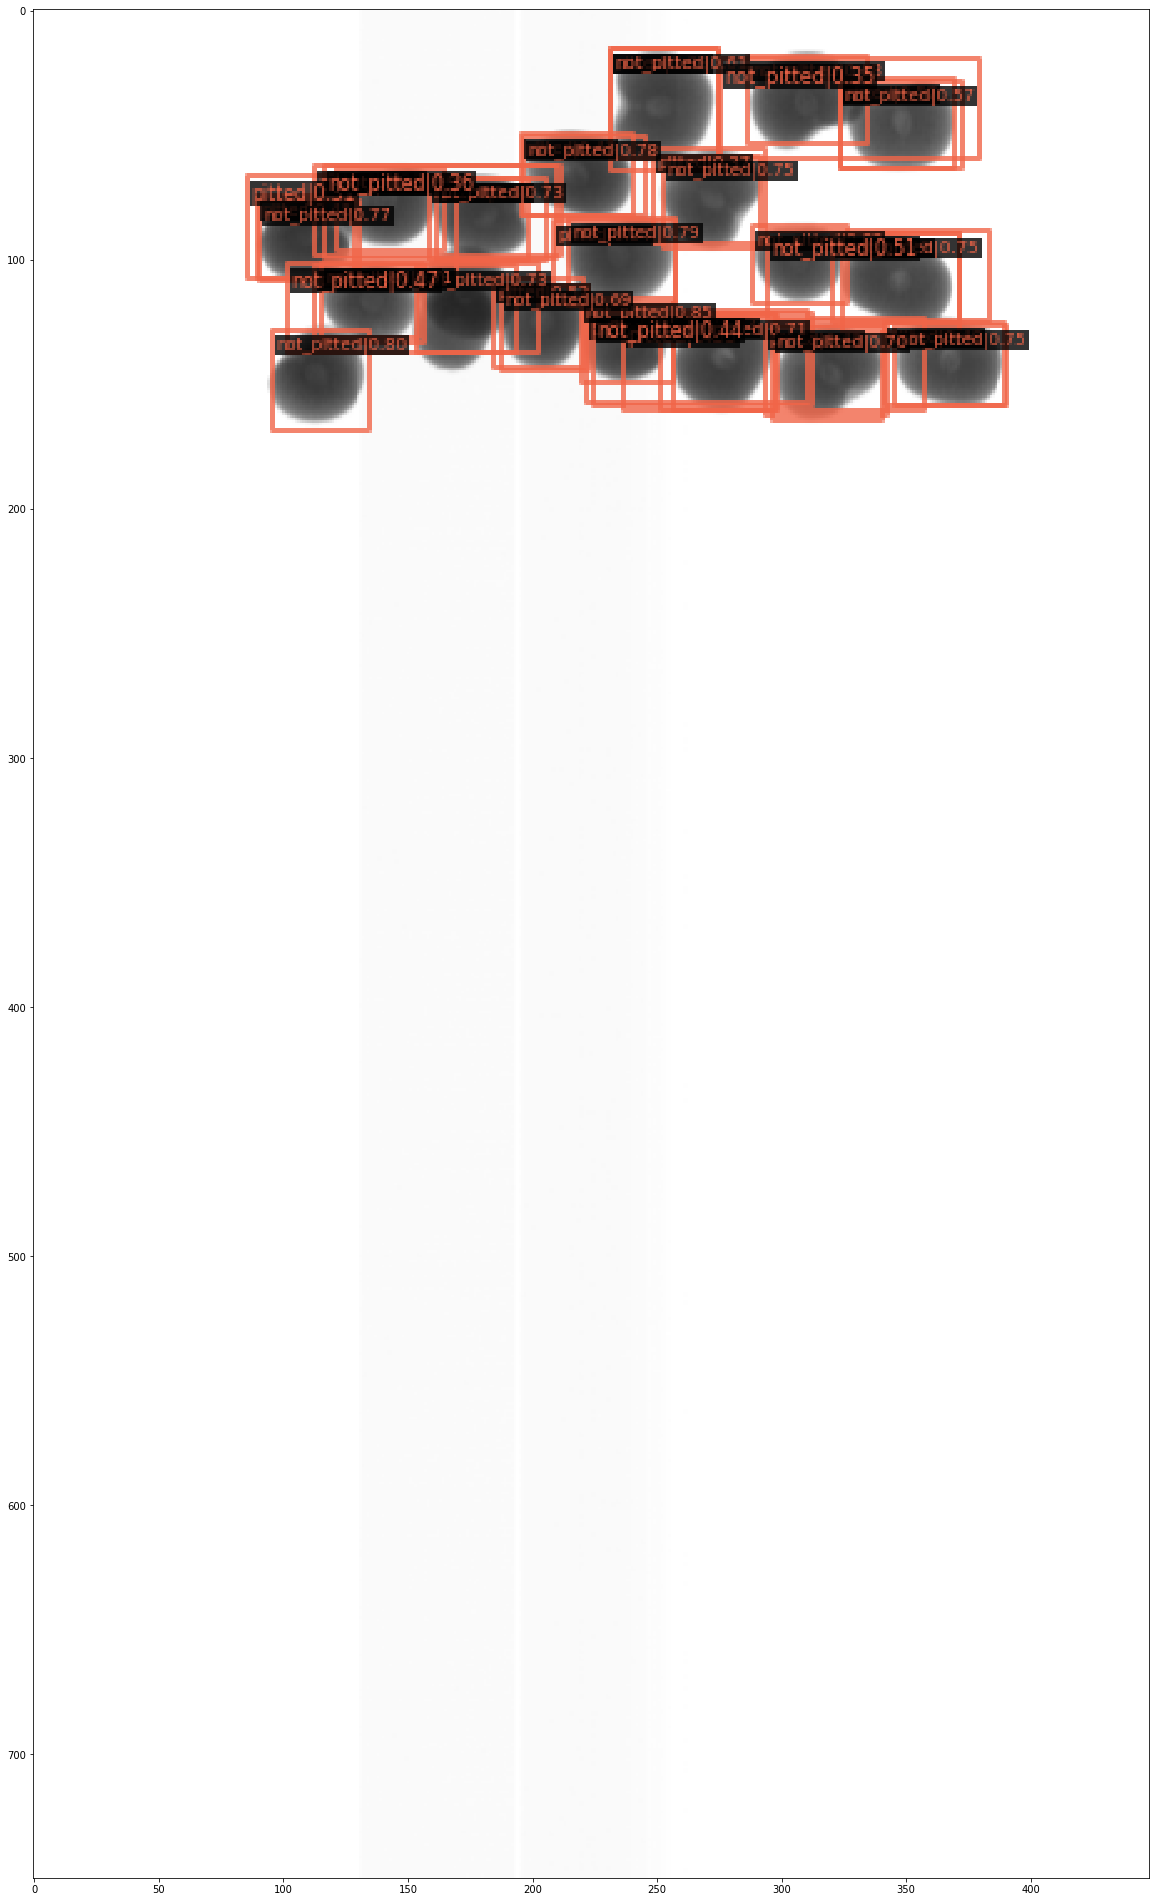

In [60]:
plt.figure(figsize = (20,40))
plt.imshow(data, interpolation='nearest')